In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor,colorbar,plot,show
%matplotlib inline

In [261]:
data=pd.read_csv('Credit_Card_Applications.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [262]:
scaler=MinMaxScaler(feature_range=(0,1))

In [263]:
X=scaler.fit_transform(X)

In [264]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [265]:
som.random_weights_init(X)

In [266]:
som.train_random(X,100)

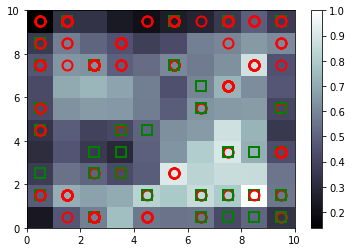

In [267]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

In [268]:
mappings=som.win_map(X)

In [270]:
fraud=mappings[(8,1)]

In [274]:
fraud=scaler.inverse_transform(fraud)

In [276]:
pd.DataFrame(fraud)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15803378.0,1.0,34.92,5.000,2.0,14.0,8.0,7.500,1.0,1.0,6.0,1.0,2.0,0.0,1001.0
1,15714087.0,1.0,32.75,1.500,2.0,13.0,8.0,5.500,1.0,1.0,3.0,1.0,2.0,0.0,1.0
2,15730793.0,1.0,27.25,1.585,2.0,13.0,8.0,1.835,1.0,1.0,12.0,1.0,2.0,583.0,714.0
3,15746995.0,1.0,34.75,15.000,2.0,12.0,7.0,5.375,1.0,1.0,9.0,1.0,2.0,0.0,135.0
4,15725028.0,1.0,65.42,11.000,2.0,10.0,9.0,20.000,1.0,1.0,7.0,1.0,2.0,22.0,1.0
5,15764444.0,1.0,39.33,5.875,2.0,13.0,8.0,10.000,1.0,1.0,14.0,1.0,2.0,399.0,1.0
6,15731989.0,1.0,67.75,5.500,2.0,10.0,9.0,13.000,1.0,1.0,1.0,1.0,2.0,0.0,1.0
7,15777893.0,1.0,37.75,7.000,2.0,11.0,8.0,11.500,1.0,1.0,7.0,1.0,2.0,300.0,6.0
